!pip install plotly
!pip install tqdm

In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from random import randint
from optimization_fixed_count import one_fit, fitness
import plotly.express as px

In [3]:
with open('overlap_relative.pickle', 'rb') as char:
    overlap_relative = pickle.load(char)

In [4]:
with open('candidate_eval.pickle', 'rb') as char:
    blob = pickle.load(char)

In [34]:
__ = os.getcwd()
data = {}
for _ in os.listdir(f'{__}/jar/fixed_count/'):
    if not _.startswith('hof') and not _.startswith('logbook') and not _.startswith('.'):
        #print(f'{_}')
        with open(f'{__}/jar/fixed_count/{_}', 'rb') as jar:
            data[_] = pickle.load(jar)

In [6]:
# solutions_greedy = [1112, 661, 170, 1382, 490, 31, 627, 759, 1280, 1340]
solutions_greedy = [873, 1299, 314, 345, 631, 154, 1115, 20, 516, 1380, 508, 699, 360, 270, 16, 1452, 489, 1106, 1340, 512, 828, 1388, 1094, 694, 8, 185, 1251, 158, 230, 411, 1355, 862, 246, 168, 220, 126, 1103, 24, 639, 39, 74, 89, 438, 1367, 1125, 236, 1399, 590, 799, 920, 490, 426, 111, 348, 1100, 1279, 13, 616, 644, 865, 80, 45, 1253, 1222, 1392, 779, 835, 529, 1135, 1327, 889, 331, 1398, 1281, 1381, 0, 1099, 564, 1160, 1182, 1338, 1385, 1249, 1124, 1101, 1098, 832, 385, 1121, 10, 1034, 1005, 855, 1110, 707, 1193, 1036, 1119, 4, 937]
data['standard_greedy'] = solutions_greedy[:10]
# solutions_greedy_weighted = [300, 1094, 28, 1442, 524, 438, 1128, 771, 411, 1193]
solutions_greedy_weighted = [16, 343, 510, 1270, 288, 172, 626, 185, 1109, 489, 246, 1381, 168, 1094, 220, 24, 478, 126, 438, 679, 1392, 1398, 862, 74, 377, 158, 490, 89, 865, 34, 694, 1222, 376, 639, 629, 80, 210, 1100, 739, 564, 1385, 11, 365, 1124, 1279, 1355, 111, 779, 1338, 889, 1005, 331, 590, 1281, 722, 1099, 1253, 1101, 1399, 835, 236, 1443, 1135, 1160, 0, 230, 759, 426, 495, 1098, 1354, 13, 1219, 799, 1340, 1249, 832, 1189, 3, 1125, 10, 1335, 855, 1110, 707, 386, 1193, 1063, 937, 1119, 616, 1036, 4, 1091, 33, 12]
data['standard_greedy_weighted'] = solutions_greedy_weighted[:10]

In [24]:
candidate_set = blob[0]
hitlists = [blobi['qualified hits'] for blobi in candidate_set]
max_cover = candidate_set[0]['max coverage area']
face_areas = blob[1]['area']

In [25]:
f = []
for dataset in data:
    print(dataset)
    if dataset.startswith('standard_greedy'):
        break
        greedy_standardset = [data[dataset][0:i+1] for i in range(1, len(data[dataset]))]
        for greedy_set in greedy_standardset:
            _ = one_fit(
                individual=greedy_set,
                overlap_rel=overlap_relative,
                qualified_hitlists_source=hitlists,
                arealist=face_areas,
                max_cov=max_cover)
            __ = fitness(
                individual=greedy_set,
                overlap_rel=overlap_relative,
                qualified_hitlists_source=hitlists,
                arealist=face_areas,
                max_cov=max_cover)
            f.append(
                {
                    'experiment': dataset,
                    'count': __[0],
                    'fitness': _[0],
                    'coverage': __[1],
                    'overlap': __[2],
                    'idlist': greedy_set
                }
            )                
        
    elif dataset.startswith('set_greedy'):
        greedy_sets = [data[dataset][0:i+1] for i in range(1, len(data[dataset]))]
        for greedy_set in greedy_sets:
            _ = one_fit(
                individual=greedy_set,
                overlap_rel=overlap_relative,
                qualified_hitlists_source=hitlists,
                arealist=face_areas,
                max_cov=max_cover)
            __ = fitness(
                individual=greedy_set,
                overlap_rel=overlap_relative,
                qualified_hitlists_source=hitlists,
                arealist=face_areas,
                max_cov=max_cover)
            f.append(
                {
                    'experiment': dataset,
                    'count': __[0],
                    'fitness': _[0],
                    'coverage': __[1],
                    'overlap': __[2],
                    'idlist': greedy_set
                }
            )
    else:
        if not dataset.startswith('set_greedy'):
            _ = one_fit(
                individual=data[dataset],
                overlap_rel=overlap_relative,
                qualified_hitlists_source=hitlists,
                arealist=face_areas,
                max_cov=max_cover)
            __ = fitness(
                individual=data[dataset],
                overlap_rel=overlap_relative,
                qualified_hitlists_source=hitlists,
                arealist=face_areas,
                max_cov=max_cover)
            f.append(
                {
                    'experiment': dataset,
                    'count': __[0],
                    'fitness': _[0],
                    'coverage': __[1],
                    'overlap': __[2],
                    'idlist': data[dataset]
                }
            )
f = pd.DataFrame(f)

set_EA_10.pkl
set_EA_2.pkl
set_EA_3.pkl
set_EA_4.pkl
set_EA_5.pkl
set_EA_6.pkl
set_EA_7.pkl
set_EA_8.pkl
set_EA_9.pkl
set_greedy_10.pkl
standard_greedy


In [31]:
f

,experiment,count,fitness,coverage,overlap,idlist
0,evolutionary algorithm,10,-0.927297,0.927297,0.432545,"[328, 790, 1238, 152, 481, 664, 19, 1301, 1129..."
1,evolutionary algorithm,2,-0.497745,0.497745,0.402627,"[873, 1125]"
2,evolutionary algorithm,3,-0.604537,0.604537,0.400452,"[873, 1125, 499]"
3,evolutionary algorithm,4,-0.714730,0.714730,0.402461,"[1325, 516, 1134, 651]"
4,evolutionary algorithm,5,-0.753374,0.753374,0.406222,"[516, 262, 1299, 651, 1127]"
5,evolutionary algorithm,6,-0.812696,0.812696,0.446487,"[499, 1272, 188, 1413, 746, 302]"
6,evolutionary algorithm,7,-0.844775,0.844775,0.400953,"[650, 967, 1433, 302, 1353, 343, 430]"
7,evolutionary algorithm,8,-0.871584,0.871584,0.414438,"[990, 1215, 362, 326, 1300, 365, 170, 663]"
8,evolutionary algorithm,9,-0.892909,0.892909,0.408694,"[681, 381, 277, 512, 1302, 188, 709, 126, 1379]"
9,greedy w fitness,2,-0.497745,0.497745,0.402627,"[873, 1125]"


In [27]:
for index, row in f.iterrows():
    if row['experiment'].startswith('set_EA'):
        f.loc[index,'experiment']='evolutionary algorithm'
    elif row['experiment'].startswith('set_greedy'):
        f.loc[index,'experiment']='greedy w fitness'

In [30]:
import pickle
with open('comparison_frame.pkl', 'wb') as jar:
    pickle.dump(f, jar)

In [32]:
fig = px.scatter_matrix(f,
                        dimensions=["count", "overlap", "coverage"],
                        color=f["experiment"]
                        )

fig.update_traces(marker=dict(size=7.5, opacity=0.75, symbol='x')) #colorscale='temps', color=f["source"], opacity=0.75))
fig.show()

In [33]:
fig = px.scatter(f, x="count", y="fitness",
#                         color_discrete_map={
#                             "random initial": "grey",
#                             "greedy best first": "orange",
#                             "greedy weighted": "yellow",
#                             "GA 1": "blue",
#                             "GA 6": "purple"
#                         },
                        color=f["experiment"]
                        )

fig.update_traces(marker=dict(size=10, opacity=0.75, symbol='x')) #colorscale='temps', color=f["source"], opacity=0.75))
fig.show()

In [12]:
fig = px.scatter(f, x="coverage", y="overlap",
                        color_discrete_map={
                            "random initial": "grey",
                            "greedy best first": "orange",
                            "greedy weighted": "yellow",
                            "GA 1": "blue",
                            "GA 6": "purple"
                        },
                        color=f["experiment"]
                        )

fig.update_traces(marker=dict(size=10, opacity=0.75, symbol='x')) #colorscale='temps', color=f["source"], opacity=0.75))
fig.show()

In [13]:
fig = px.scatter(f, x="coverage", y="overlap",
                        color_discrete_map={
                            "random initial": "grey",
                            "greedy best first": "orange",
                            "greedy weighted": "yellow",
                            "GA 1": "blue",
                            "GA 6": "purple"
                        },
                        color=f["experiment"]
                        )

fig.update_traces(marker=dict(size=10, opacity=0.75, symbol='x')) #colorscale='temps', color=f["source"], opacity=0.75))
fig.show()

In [14]:
f.sort_values(by=['count'], inplace=True)

fig = px.line(f, x="count", y="coverage",
              color_discrete_map={
                  "random initial": "grey",
                  "greedy best first": "orange",
                  "greedy weighted": "yellow",
                  "GA 1": "blue",
                  "GA 6": "purple"
              },
              color=f["experiment"],
              markers=True
             )

fig.update_traces(marker=dict(size=10, opacity=0.75, symbol='x')) #colorscale='temps', color=f["source"], opacity=0.75))
fig.show()

In [15]:
fig = px.scatter_3d(f, x="overlap", y="coverage", z="count",
#                    color_discrete_map={
#                             "random initial": "grey",
#                             "greedy best first": "orange",
#                             "greedy weighted": "yellow",
#                             "GA 1": "blue"
#                         },
                   color=f["experiment"])
fig.update_traces(marker=dict(size=5, opacity=0.5)) #colorscale='temps', color=f["source"], opacity=0.75))
fig.show()

# REVISIT COV COUNT PLOT GREEDY

In [16]:
g = []
for nomen, set in zip(['weighted', 'non weighted'],[solutions_greedy_weighted, solutions_greedy]):
    greedy_sets = [set[0:i+1] for i in range(1, len(set))]
    
    for greedy_set in greedy_sets:
        _ = one_fit(
            individual=greedy_set,
            overlap_rel=overlap_relative,
            qualified_hitlists_source=hitlists,
            arealist=face_areas,
            max_cov=max_cover)
        __ = fitness(
            individual=greedy_set,
            overlap_rel=overlap_relative,
            qualified_hitlists_source=hitlists,
            arealist=face_areas,
            max_cov=max_cover)
        g.append(
            {
                'experiment': nomen,
                'count': __[0],
                'fitness': _[0],
                'coverage': __[1],
                'overlap': __[2]
            }
        )
g = pd.DataFrame(g)

In [17]:
_ = fitness(
individual= solutions_greedy,
overlap_rel= overlap_relative,
qualified_hitlists_source=hitlists,
arealist=face_areas,
max_cov=max_cover)
_

(100, 1.0, 0.2141505755662108)

In [18]:
pd.set_option('display.max_rows', None)
g

,experiment,count,fitness,coverage,overlap
0,weighted,2,99.771803,0.228197,0.187431
1,weighted,3,99.632423,0.367577,0.162849
2,weighted,4,99.373187,0.626813,0.090899
3,weighted,5,99.241741,0.758259,0.090899
4,weighted,6,99.205993,0.794007,0.090899
5,weighted,7,99.111122,0.888878,0.144733
6,weighted,8,99.101204,0.898796,0.144733
7,weighted,9,99.062099,0.937901,0.209741
8,weighted,10,99.059659,0.940341,0.212617
9,weighted,11,99.057939,0.942061,0.212617


In [19]:
coverage_goal = np.arange(0.05,1.05,0.05)
print(coverage_goal)

standard_greedy_coverage = g[g['experiment'] == 'non weighted']
weighted_greedy_coverage = g[g['experiment'] == 'weighted']

lista = [(num, cov) for num, cov in zip(standard_greedy_coverage['count'], standard_greedy_coverage['coverage'])]
listb = [(num, cov) for num, cov in zip(weighted_greedy_coverage['count'], weighted_greedy_coverage['coverage'])]
standard_coverage = []
standard_count = []
for coverage in coverage_goal:
    for row in lista:
        if round(row[1],5) >= coverage:
            standard_coverage.append(row[1])
            standard_count.append(row[0])
            break
weighted_coverage = []
weighted_count = []
for coverage in coverage_goal:
    for row in listb:
        if round(row[1],5) >= coverage:
            weighted_coverage.append(row[1])
            weighted_count.append(row[0])
            break
            
print(len(coverage_goal), len(weighted_count), len(weighted_coverage), len(standard_coverage), len(weighted_coverage))

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
20 20 20 20 20


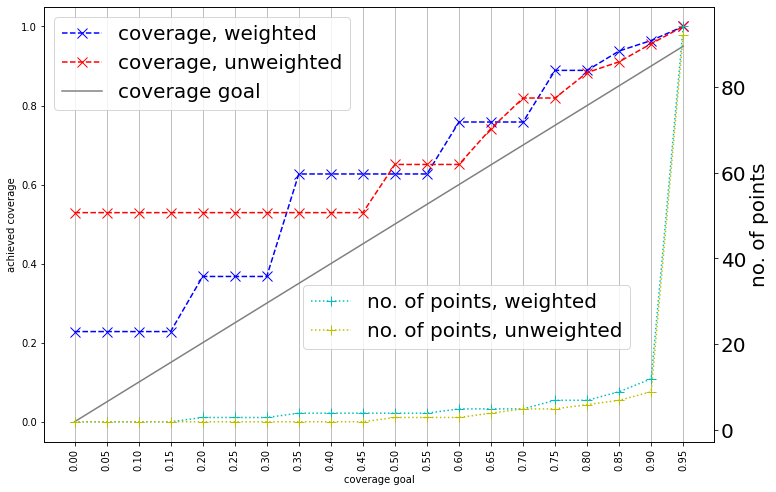

In [20]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)
plt.rcParams.update({'font.size': 20})

ax1.set_xlabel('coverage goal')
plt.xticks(rotation=90)
ax1.set_ylabel('achieved coverage')

coverage_goal = [tick for tick in np.arange(0, 1, 0.05)]

ax1.set_xticks(coverage_goal)
ax1.grid(axis="x")

#plots
ax1.plot(coverage_goal,
         weighted_coverage,
         linestyle='--', marker='x', markersize=10, color='b', label='coverage, weighted')
ax1.plot(coverage_goal,
         standard_coverage,
         linestyle='--', marker='x', markersize=10, color='r', label='coverage, unweighted')
ax1.plot(coverage_goal,
         coverage_goal,         
         linestyle='-', marker='', color='grey', label='coverage goal')
leg = plt.legend(loc='upper left')

#plots_2
ax2 = ax1.twinx()
ax2.set_ylabel('no. of points')
#ax2.set_yscale('log')
ax2.plot(coverage_goal,
         weighted_count,
         linestyle=':', marker='+', markersize=10, color='c', label='no. of points, weighted')
ax2.plot(coverage_goal,
         standard_count,
         linestyle=':', marker='+', markersize=10, color='y', label='no. of points, unweighted')
leg = plt.legend(bbox_to_anchor=(0.89,0.190))

NameError: name 'coverage_eval' is not defined

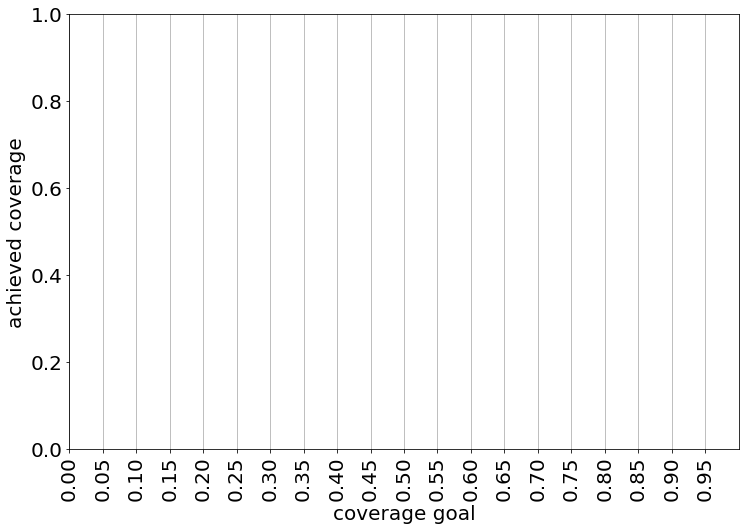

In [21]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)
plt.rcParams.update({'font.size': 20})

ax1.set_xlabel('coverage goal')
plt.xticks(rotation=90)
ax1.set_ylabel('achieved coverage')


ax1.set_xticks(coverage_goal)
ax1.grid(axis="x")

ax1.plot([y[0] for y in coverage_eval],
         [y[1][1] for y in coverage_eval],
         linestyle='--', marker='x', markersize=10, color='b', label='coverage, weighted')
ax1.plot([y[0] for y in coverage_eval],
         [y[2][1] for y in coverage_eval],
         linestyle='--', marker='x', markersize=10, color='r', label='coverage, unweighted')
ax1.plot([y[0] for y in coverage_eval],
         [y[0] for y in coverage_eval],         
         linestyle='-', marker='', color='grey', label='coverage goal')
leg = plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('no. of points')
#ax2.set_yscale('log')
ax2.plot([y[0] for y in coverage_eval],
         [y[1][0] for y in coverage_eval],
         linestyle=':', marker='+', markersize=10, color='c', label='no. of points, weighted')
ax2.plot([y[0] for y in coverage_eval],
         [y[2][0] for y in coverage_eval],
         linestyle=':', marker='+', markersize=10, color='y', label='no. of points, unweighted')
leg = plt.legend(bbox_to_anchor=(0.89,0.190))